In [1]:
# Installing required modules
#!pip install contractions
#!pip install plotly
#!pip install langid
#!pip install pyLDAvis
#!pip install deep_translator
#!pip install vaderSentiment
#!pip install https://github.com/sulunemre/word_cloud/releases/download/2/wordcloud-0.post1+gd8241b5-cp39-cp39-win_amd64.whl

In [2]:
# Impoting required modules/libraries
import numpy as np
import pandas as pd
import string
import nltk
import pattern
from nltk.corpus import stopwords
from pattern.en import lemma
import codecs
from deep_translator import GoogleTranslator
import string   
import re
import langid
import contractions
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv("C:/Users/malay/Scraping reviews.csv")

In [4]:
data.head(10)

,reviews
0,\nLook is very bad. Not satisfy......please don't buy this.\n
1,\nPrice wise Very good Product 👍\n
2,"\nThis shoe is total waste of money. It's cheap but quality is even cheaper. Opening of the shoe is very narrow and fixed. if your size is 9 or 10, you will face difficulty wearing it. Even small pebbles on road makes damaging hole in the sole. The sole is very weak and soft.\n"
3,"\nWaste of money, damaged, only one month used this product from deliver date to 27 Jan. 21, and his shole cracked and damage, so plz. How can I refund the material if possible then suggest to us. Otherwise thanks for waste of my money 💰.\n"
4,\n\n\n\n\n The media could not be loaded.\n \n\n\n\n Worst product. Please dont buy. Cheaters painted at the bottom and very poor quality product. Frudulance.Image given was extremely different.Looks like a local school shoeAmazon team should be responsible for such sellers.\n
5,"\nThis shoe is not fit for jogging purpose but can use for normal casual purpose. I felt little Uncomfortable while walking. Sole seems not good.With this price (Rs 259), we can't expect too much comfort as we are getting from international branded shoes.\n"
6,"\nDelivered as promised, Fitting is good, Quality is worth. Only problem is with packaging, only 1 star for packaging. Box is damaged. Product is dusty like it's used. Distributor should ensure that while packing the product must be cleaned and then packed.Rest quality and comfort is worth at this price.\n"
7,"\nsuch a substandard product, not fit for a platform like amazon to allow them to trade on its space. Product not even worth for Rs. 99/- ( a basic sandals price in India). Totally disappointed with the product had to dispose off it in the trash bin.\n"
8,\nDesign is different from the display pic. Product not the same. Overall quality of material is also different from the picture; poor quality material. Looks like a cheap copy of the original product.\n
9,\nThe Shoes is hard from inside please if possible give shoes sole also over all good product form people who walk not for jogging\n


In [5]:
df = data.copy()

In [6]:
# Checking for null values
df['reviews'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3827    False
3828    False
3829    False
3830    False
3831    False
Name: reviews, Length: 3832, dtype: bool>

In [7]:
# Converting column to string datatype
df = df.astype({"reviews": str})

In [8]:
#All the reviews have '\n' at the end. Let's remove it.
df['reviews']=df['reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review

In [9]:
# Reomving the media could not be loaded line
for i in range(len(df['reviews'])):
    df['reviews'] = df['reviews'].str.replace("The media could not be loaded","")

In [10]:
df.head(10)

,reviews
0,Look is very bad. Not satisfy......please don't buy this.
1,Price wise Very good Product 👍
2,"This shoe is total waste of money. It's cheap but quality is even cheaper. Opening of the shoe is very narrow and fixed. if your size is 9 or 10, you will face difficulty wearing it. Even small pebbles on road makes damaging hole in the sole. The sole is very weak and soft."
3,"Waste of money, damaged, only one month used this product from deliver date to 27 Jan. 21, and his shole cracked and damage, so plz. How can I refund the material if possible then suggest to us. Otherwise thanks for waste of my money 💰."
4,.\n \n\n\n\n Worst product. Please dont buy. Cheaters painted at the bottom and very poor quality product. Frudulance.Image given was extremely different.Looks like a local school shoeAmazon team should be responsible for such sellers.
5,"This shoe is not fit for jogging purpose but can use for normal casual purpose. I felt little Uncomfortable while walking. Sole seems not good.With this price (Rs 259), we can't expect too much comfort as we are getting from international branded shoes."
6,"Delivered as promised, Fitting is good, Quality is worth. Only problem is with packaging, only 1 star for packaging. Box is damaged. Product is dusty like it's used. Distributor should ensure that while packing the product must be cleaned and then packed.Rest quality and comfort is worth at this price."
7,"such a substandard product, not fit for a platform like amazon to allow them to trade on its space. Product not even worth for Rs. 99/- ( a basic sandals price in India). Totally disappointed with the product had to dispose off it in the trash bin."
8,Design is different from the display pic. Product not the same. Overall quality of material is also different from the picture; poor quality material. Looks like a cheap copy of the original product.
9,The Shoes is hard from inside please if possible give shoes sole also over all good product form people who walk not for jogging


In [11]:
# Settinf stopwords
STOPWORDS=set(stopwords.words("english")) #stopwords are the most common unnecessary words. eg is, he, that, etc.
exclude_words = set("not")
STOPWORDS = STOPWORDS.difference(exclude_words)

In [12]:
# Function to translate Hindi to English
def translate(text):
    a = langid.classify(text)
    if a[0] == 'hi':
        return GoogleTranslator(source='auto', target='en').translate(text)
    else:
        return text
    

In [13]:
df['reviews'] = df['reviews'].apply(lambda x:translate(x))

In [14]:
# Function to remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [15]:
# Function to clean the data(stopwords, punctuations,lowercase,contractions)
def clean_text(text):
    
    text=deEmojify(text) # remove emojis
    text_cleaned=contractions.fix(text) # handle contractions
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    
    text_cleaned=" ".join([lemma(token) for token in tokens])
    
    
    return text_cleaned

In [17]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [18]:
df.head(10)

,reviews,cleaned_reviews
0,Look is very bad. Not satisfy......please don't buy this.,look bad satisfyplease dont buy
1,Price wise Very good Product 👍,price wise good product have
2,"This shoe is total waste of money. It's cheap but quality is even cheaper. Opening of the shoe is very narrow and fixed. if your size is 9 or 10, you will face difficulty wearing it. Even small pebbles on road makes damaging hole in the sole. The sole is very weak and soft.",shoe total waste money cheap quality even cheaper open shoe narrow fix size 9 10 face difficulty wear even small pebble road make damage hole sole sole weak soft
3,"Waste of money, damaged, only one month used this product from deliver date to 27 Jan. 21, and his shole cracked and damage, so plz. How can I refund the material if possible then suggest to us. Otherwise thanks for waste of my money 💰.",waste money damage one month used product deliver date 27 jan 21 shole crack damage plz refund material possible suggest u otherwise thank waste money have
4,.\n \n\n\n\n Worst product. Please dont buy. Cheaters painted at the bottom and very poor quality product. Frudulance.Image given was extremely different.Looks like a local school shoeAmazon team should be responsible for such sellers.,have \n \n\n\n\nworst product please dont buy cheater paint bottom poor quality product frudulanceimage give extremely differentlook like local school shoeamazon team responsible seller
5,"This shoe is not fit for jogging purpose but can use for normal casual purpose. I felt little Uncomfortable while walking. Sole seems not good.With this price (Rs 259), we can't expect too much comfort as we are getting from international branded shoes.",shoe fit jog purpose use normal casual purpose feel little uncomfortable walk sole seem goodwith price r 259 cant expect much comfort get international brand shoe
6,"Delivered as promised, Fitting is good, Quality is worth. Only problem is with packaging, only 1 star for packaging. Box is damaged. Product is dusty like it's used. Distributor should ensure that while packing the product must be cleaned and then packed.Rest quality and comfort is worth at this price.",deliver promise fit good quality worth problem package 1 star package box damage product dusty like used distributor ensure pack product must clean packedrest quality comfort worth price
7,"such a substandard product, not fit for a platform like amazon to allow them to trade on its space. Product not even worth for Rs. 99/- ( a basic sandals price in India). Totally disappointed with the product had to dispose off it in the trash bin.",substandard product fit platform like amazon allow trade space product even worth r 99 basic sandal price india totally disappoint product dispose trash bin
8,Design is different from the display pic. Product not the same. Overall quality of material is also different from the picture; poor quality material. Looks like a cheap copy of the original product.,design different display pic product overall quality material also different picture poor quality material look like cheap copy original product
9,The Shoes is hard from inside please if possible give shoes sole also over all good product form people who walk not for jogging,shoe hard inside please possible give shoe sole also good product form people walk jog


In [19]:
# Function to plot a bar chart for non-stopword words
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

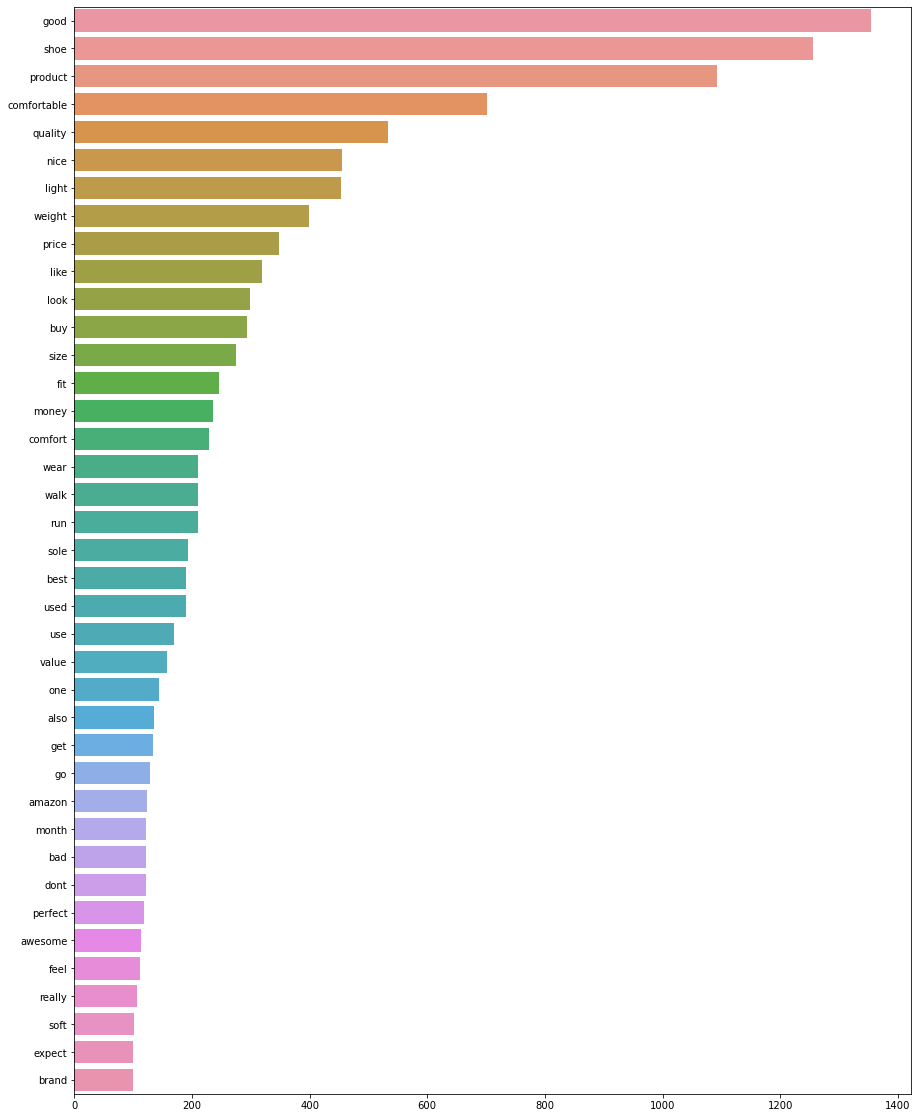

In [52]:
plot_top_non_stopwords_barchart(df['cleaned_reviews'])

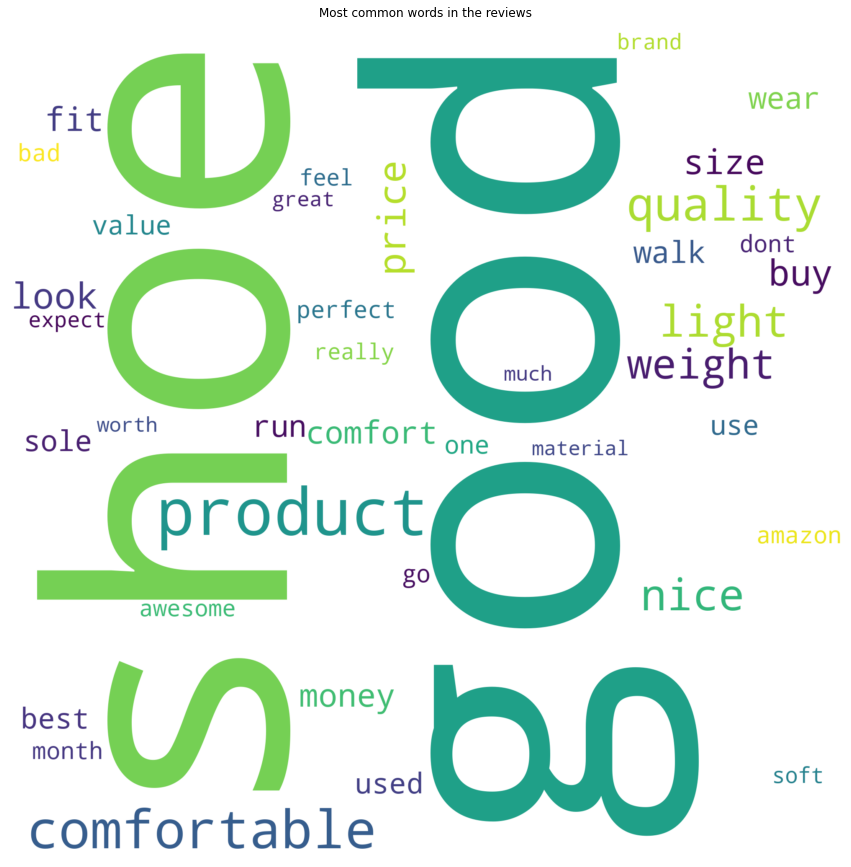

In [51]:
# Wordcloud for all reviews
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=40, background_color='white', collocations = False)
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [22]:
# initiating the VADER module
analyser = SentimentIntensityAnalyzer()

In [23]:
# Function to calculate sentiment score
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [24]:
# Function to calculate compound score
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [25]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [26]:
df.sample(10)

,reviews,cleaned_reviews,sentiment_score
3142,Not for daily running and long running Too loose,daily run long run loose,-0.3182
731,Amazing product,amaze product,0.5859
1091,Nice,nice,0.4215
804,Good,good,0.4404
1628,.\n \n\n\n\n Looks pretty good and so comfortable..worthble for price,have \n \n\n\n\nlook pretty good comfortableworthble price,0.7269
1811,Best shoes i have ever bought .a quality product,best shoe ever buy quality product,0.6369
2741,Turned out perfect. Timely delivery.,turn perfect timely delivery,0.5719
1463,"Writing review after 1 month use of product. Super comfortable shoes. You will love it after use. Without a second thought, go for it.",write review 1 month use product super comfortable shoe love use without second think go,0.9081
649,Good,good,0.4404
1533,Excellent,excellent,0.5719


In [27]:
# Function to classify category for reviews
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [28]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [29]:
df.sample(10)

,reviews,cleaned_reviews,sentiment_score,review_category
66,Nice product,nice product,0.4215,positive
423,.\n \n\n\n\n Just avarage product,have \n \n\n\n\njust avarage product,0.0000,neutral
943,"Nice product in 1100 rs.. But only for outside, you can't use this product on indoor tiles floor",nice product 1100 r outside cant use product indoor tile floor,0.2263,positive
1876,Amzing Quality.light weight very confertable. My budget shoes. Really amazing,amze qualitylight weight confertable budget shoe really amaze,0.6240,positive
3808,Nice excellent,nice excellent,0.7579,positive
1112,This is good for working and value for money.,good work value money,0.6486,positive
1460,I like this product. I am reviewing it after a whole day of experience.Design ⭐⭐⭐⭐⭐Comfort ⭐⭐⭐⭐⭐Lightweight ⭐⭐⭐⭐⭐,like product review whole day experiencedesign comfort lightweight have,0.3612,positive
712,Nice Shoes,nice shoe,0.4215,positive
2520,Very nice product,nice product,0.4754,positive
2209,"The shoes are perfect for casual wear, they are lightweight and look good on almost everything. I would suggest one to buy these when looking for daily wear shoes.",shoe perfect casual wear lightweight look good almost everythe would suggest one buy look daily wear shoe,0.8126,positive


C:\Users\malay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Reviews Category')

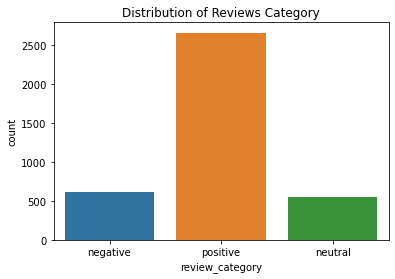

In [30]:
# Barplot for distribution of categories
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [31]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list

In [32]:
neutral_reviews=df.loc[df['review_category']=='neutral','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list

In [33]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list

Text(0.5, 1.0, 'Reviews Distribution')

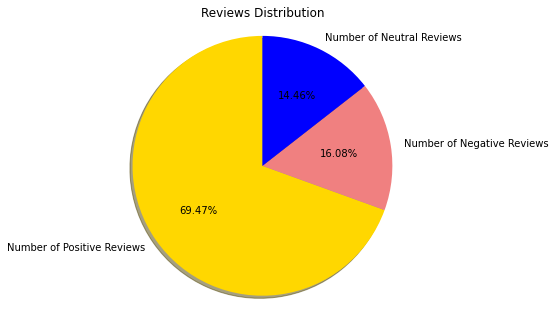

In [34]:
# Pie chart for distribution of categories
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = [len(positive_reviews), len(negative_reviews), len(neutral_reviews)]

ax.pie(values, 
       labels = ['Number of Positive Reviews', 'Number of Negative Reviews', 'Number of Neutral Reviews'],
       colors=['gold', 'lightcoral', 'blue'],
       shadow=True,
       startangle=90, 
       autopct='%1.2f%%')
ax.axis('equal')
plt.title('Reviews Distribution')

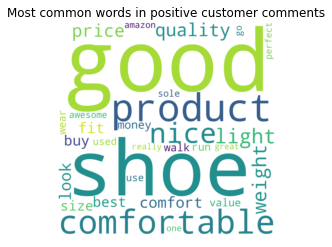

In [35]:
# Wordcloud for positive reviews
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color = "white", collocations = False, max_words = 30)
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

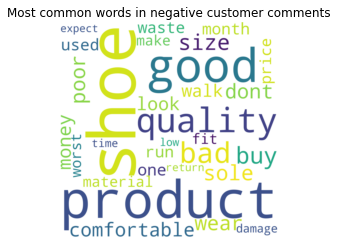

In [36]:
# Wordcloud for negative reviews
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white', max_words=30, collocations=False)
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

In [37]:
# Function to get the most common top words in reviews
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [38]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [39]:
top_20_positive_review_words

[('good', 1162),
 ('shoe', 933),
 ('product', 804),
 ('comfortable', 645),
 ('nice', 441),
 ('light', 402),
 ('weight', 361),
 ('quality', 314),
 ('price', 296),
 ('like', 270),
 ('have', 262),
 ('look', 240),
 ('comfort', 212),
 ('fit', 207),
 ('buy', 192),
 ('best', 185),
 ('size', 179),
 ('money', 172),
 ('walk', 152),
 ('run', 152)]

In [40]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)
top_20_negative_review_words

[('shoe', 238),
 ('product', 213),
 ('good', 170),
 ('quality', 166),
 ('bad', 112),
 ('buy', 71),
 ('have', 67),
 ('size', 62),
 ('sole', 59),
 ('poor', 56),
 ('wear', 54),
 ('dont', 53),
 ('comfortable', 52),
 ('money', 49),
 ('look', 47),
 ('get', 45),
 ('like', 43),
 ('\n', 42),
 ('walk', 42),
 ('one', 36)]

In [41]:
# Function to plot the most common top words in reviews
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

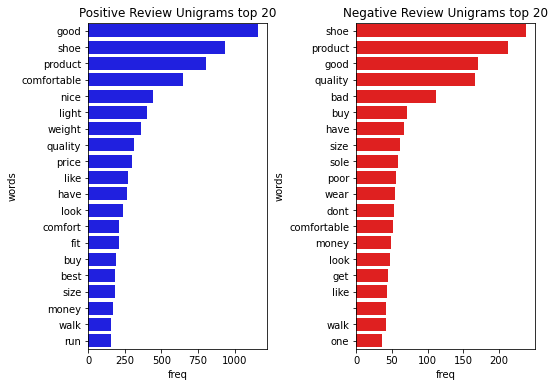

In [42]:
# Plotting Unigrams
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])


In [43]:
# Function to generate n-grams
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [44]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

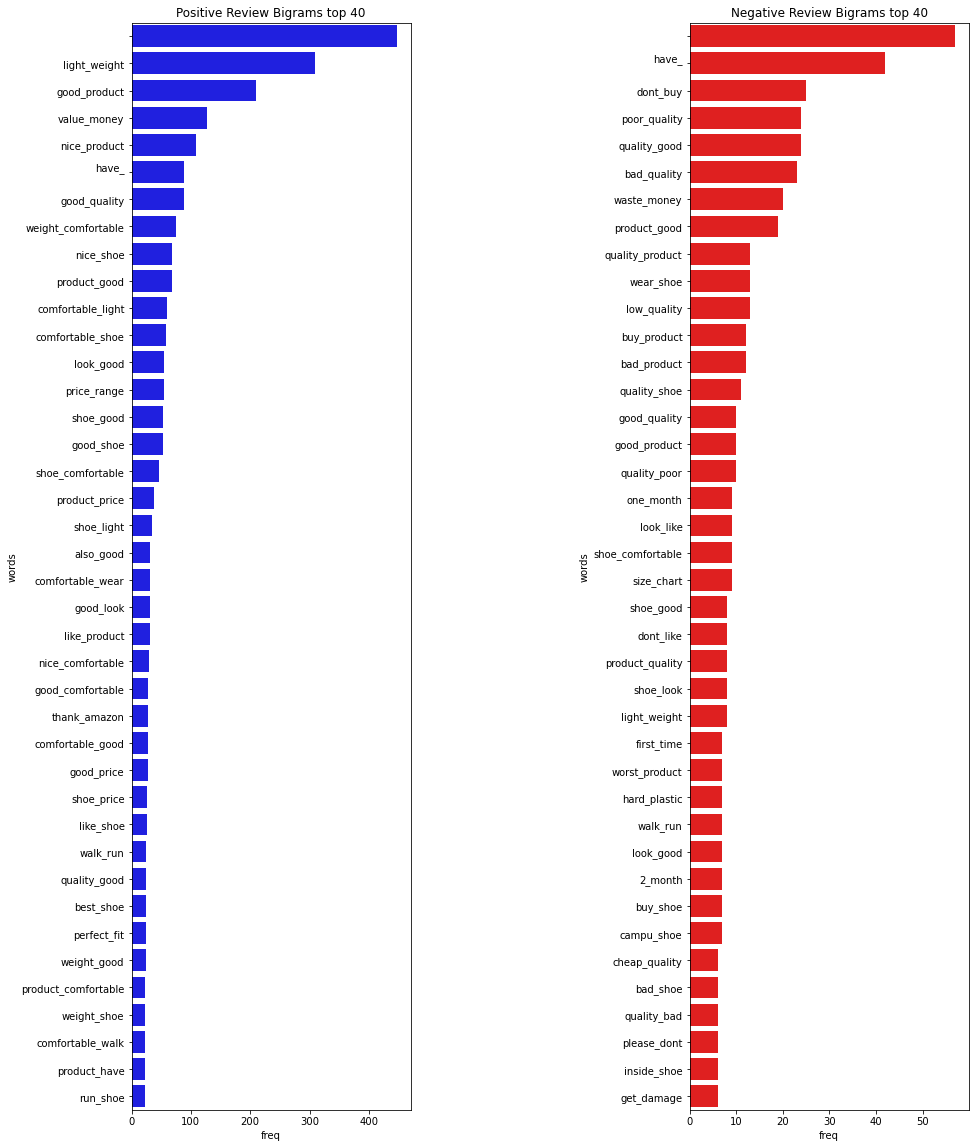

In [45]:
# Plotting bigrams
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

In [46]:
df_pos = pd.DataFrame({'Pos_reviews': df.loc[df['review_category']=='positive','cleaned_reviews']})
df_pos.sample(5)

,Pos_reviews
1817,excellent product buylow weight like nothe u wearit deluxe product wearthank amazonsuper fast delivery
1760,good product worth rate expect different product recive different
1886,awesome quality
2438,shoe light weight well mend insole good quality give feet great comfort
2551,perfect have


In [47]:
df_neg = pd.DataFrame({'Neg_reviews': df.loc[df['review_category']=='negative','cleaned_reviews']})
df_neg.sample(5)

,Neg_reviews
2501,product light wait attol comfortable inside warm minute bad
41,have \n \n\n\n\ndislike
1400,long last poor quality
2041,quality good inside sole remove time delivery
2224,didnt like material select return still one come taketotally disappoint


C:\Users\malay\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


The shape of the tfidf is (616, 75), meaning that there are 616 Neg_reviews and 75 tokens made through the filtering process.
Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Model Log Likelihood Score:  -1311.9849969500433
Model Perplexity:  129.12836531837516


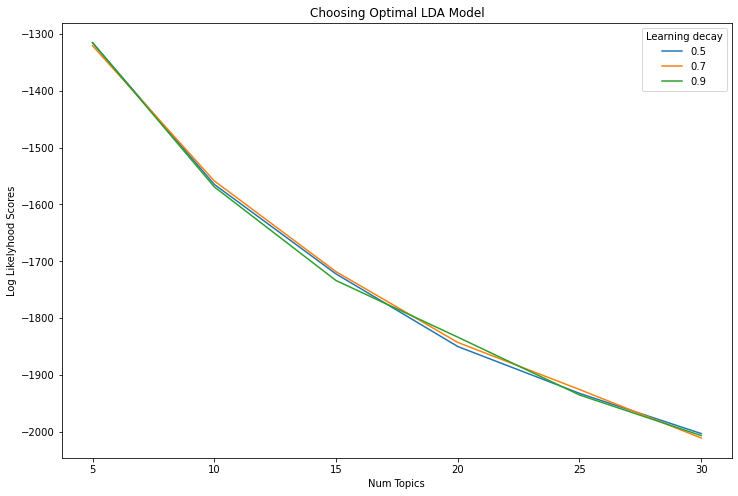

In [48]:
#Create a function to build the optimal LDA model
def optimal_lda_model(df_review, review_colname):
    
    docs_raw = df_review[review_colname].tolist()

   

    #Transform text to vector form using the vectorizer object 
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                    stop_words = 'english',
                                    lowercase = True,
                                    token_pattern = r'\b[a-zA-Z]{3,}\b', # num chars > 3 to avoid some meaningless words
                                    max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                    min_df = 10)                         # discard words that appear in < 10 reviews    

    #apply transformation
    tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

    #convert to document-term matrix
    dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)  

    print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_colname, dtm_tfidf.shape[1]))

    

    # Define Search Param
    search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                     'learning_decay': [.5, .7, .9]}

    # Init the Model
    lda = LatentDirichletAllocation()

    # Init Grid Search Class
    model = GridSearchCV(lda, param_grid=search_params)

    # Do the Grid Search
    model.fit(dtm_tfidf)



    # Best Model
    best_lda_model = model.best_estimator_

    # Model Parameters
    print("Best Model's Params: ", model.best_params_)

    # Log Likelihood Score: Higher the better
    print("Model Log Likelihood Score: ", model.best_score_)

    # Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
    print("Model Perplexity: ", best_lda_model.perplexity(dtm_tfidf))



    #Get Log Likelyhoods from Grid Search Output
    gscore=model.fit(dtm_tfidf).cv_results_
    n_topics = [5, 10, 15, 20, 25, 30]

    log_likelyhoods_5 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.5]
    log_likelyhoods_7 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.7]
    log_likelyhoods_9 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.9]

    # Show graph
    plt.figure(figsize=(12, 8))
    plt.plot(n_topics, log_likelyhoods_5, label='0.5')
    plt.plot(n_topics, log_likelyhoods_7, label='0.7')
    plt.plot(n_topics, log_likelyhoods_9, label='0.9')
    plt.title("Choosing Optimal LDA Model")
    plt.xlabel("Num Topics")
    plt.ylabel("Log Likelyhood Scores")
    plt.legend(title='Learning decay', loc='best')
    plt.show()
    
    return best_lda_model, dtm_tfidf, tfidf_vectorizer
    
best_lda_model, dtm_tfidf, tfidf_vectorizer = optimal_lda_model(df_neg, 'Neg_reviews')

In [49]:
#Create a function to inspect the topics we created 
def display_topics(model, feature_names, n_top_words):
    
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx+1)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx+1)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


display_topics(best_lda_model, tfidf_vectorizer.get_feature_names(), n_top_words = 20) 


C:\Users\malay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights
0,shoe,27.0,worst,16.6,product,22.2,bad,54.8,quality,42.0
1,comfortable,23.9,product,11.3,money,21.6,good,47.8,poor,29.2
2,wear,20.6,time,9.9,like,19.0,product,23.3,good,24.4
3,size,15.9,shoe,9.5,waste,16.7,quality,19.2,low,15.0
4,dislike,14.5,purchase,9.4,dont,14.6,damage,15.1,material,14.9
5,run,13.9,finish,9.3,fit,11.9,shoe,14.5,sole,10.1
6,walk,11.9,order,7.8,return,8.7,buy,13.8,expect,10.1
7,different,9.0,defective,7.3,disappoint,7.7,look,10.8,price,9.5
8,foot,8.7,break,6.4,buy,6.7,sole,10.2,hard,8.7
9,make,8.6,size,6.2,amazon,5.9,satisfy,8.8,cheap,8.7


In [50]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

C:\Users\malay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\malay\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.143285  0.115843       1        1  22.859387
4      0.215567 -0.010698       2        1  21.815561
0     -0.197462 -0.158732       3        1  21.716647
2      0.037909 -0.147365       4        1  17.706219
1     -0.199299  0.200952       5        1  15.902185, topic_info=         Term       Freq      Total Category  logprob  loglift
1         bad  52.000000  52.000000  Default  30.0000  30.0000
50    quality  55.000000  55.000000  Default  29.0000  29.0000
26       good  67.000000  67.000000  Default  28.0000  28.0000
45       poor  27.000000  27.000000  Default  27.0000  27.0000
39      money  21.000000  21.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
3       brand   0.224515   6.792890   Topic5  -6.6425  -1.5710
13        day   0.226771   8.178978   Topic5  -6.6325  -1.7467
17  different   0.228512  10.038420   Topic5  -6.6249  -1.9439
50    quality   0.235029  55.859332   Topic5  -6.5968  -3.6322
46      price   0.226030  12.714097   Topic5  -6.6358  -2.1911

[194 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         4  0.628019  amazon
0         5  0.314009  amazon
1         1  0.893630     bad
1         5  0.095067     bad
2         3  0.341261     bit
...     ...       ...     ...
72        5  0.947795   worst
73        2  0.283757   worth
73        4  0.567515   worth
74        1  0.149731   wrong
74        5  0.748655   wrong

[145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])